In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv('insurance.csv')
df = data[['age', 'bmi', 'children', 'charges']]
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [5]:
df.isnull().sum()

age         0
bmi         0
children    0
charges     0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

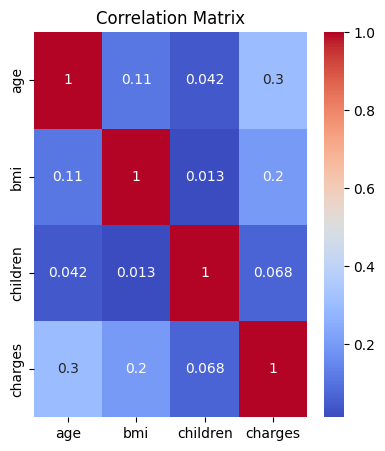

In [6]:
plt.figure(figsize=(15, 5))
    
# Correlation heatmap
plt.subplot(131)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

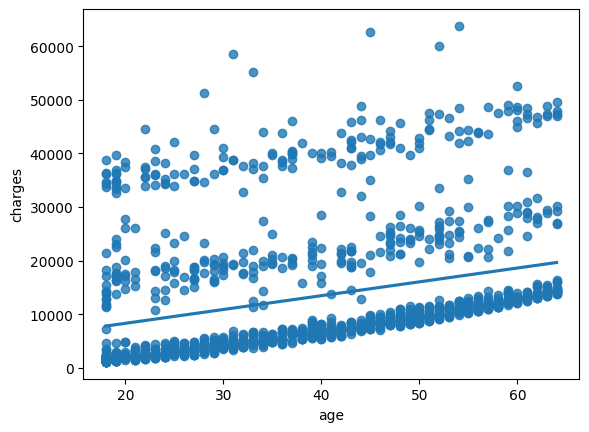

In [14]:
sns.regplot(x=df['age'], y=df['charges'], ci=None)
plt.show()

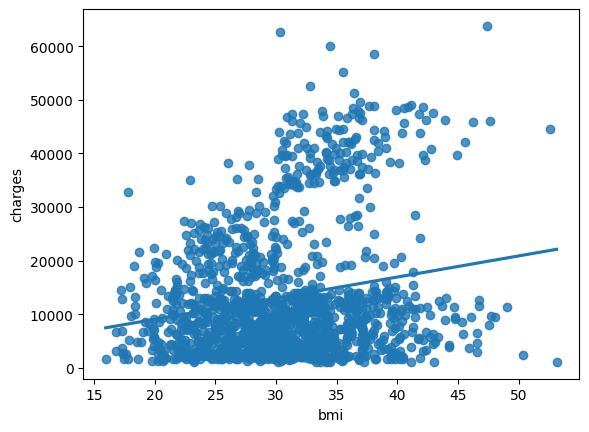

In [12]:
sns.regplot(x=df['bmi'], y=df['charges'], ci=None)
plt.show()

In [15]:
X = df[['age', 'children', 'bmi']].values.astype(float)
y = df[['charges']].values.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
linearmodel = LinearRegression()

linearmodel.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = linearmodel.predict(X_test)

In [18]:
print('Score or R-Squared:', linearmodel.score(X_test, y_test))

print('Root Mean Squared Error:', 
      np.sqrt(mean_squared_error(y_test, y_pred)))

# điểm R Square thấp cho thấy mô hình dự đoán không hiệu quả, việc này có thể do tương quan giữa các biến đầu vào và đầu ra không cao
# điểm RMSE cho thấy kết quả dự đoán và kết quả thực tế chênh lệch khoảng 11454 đơn vị

Score or R-Squared: 0.15489592484270753
Root Mean Squared Error: 11454.315153980095
